In [ ]:
import pandas as pd

df = pd.read_csv('IMDb_Movies_India.csv', encoding='latin1')

df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df['Genre'] = df['Genre'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Actor 1'] = df['Actor 1'].fillna('Unknown')
df['Actor 2'] = df['Actor 2'].fillna('Unknown')
df['Actor 3'] = df['Actor 3'].fillna('Unknown')

df['Votes'] = df['Votes'].fillna(0)

df.isnull().sum()


,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:

print(df['Duration'].dtype)
print(df['Duration'].head())

df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)


float64
0      0.0
1    109.0
2     90.0
3    110.0
4    105.0
Name: Duration, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Votes', 'Duration']] = scaler.fit_transform(df[['Votes', 'Duration']])


In [ ]:

X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = df['Rating']

X = pd.get_dummies(X, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6335, 12060) (1584, 12060) (6335,) (1584,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression Results: MSE = {mse_lr:.2f}, R² = {r2_lr:.2f}")


Linear Regression Results: MSE = 370181331853319847542784.00, R² = -199113734458290884050944.00


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Results: MSE = {mse_rf:.2f}, R² = {r2_rf:.2f}")


Random Forest Results: MSE = 1.42, R² = 0.23


In [ ]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network Results: MSE = {mse_nn:.2f}, R² = {r2_nn:.2f}")


Neural Network Results: MSE = 2.50, R² = -0.35


In [ ]:
print("Model Performance Comparison:")
print(f"Linear Regression: MSE = {mse_lr:.2f}, R² = {r2_lr:.2f}")
print(f"Random Forest: MSE = {mse_rf:.2f}, R² = {r2_rf:.2f}")
print(f"Neural Network: MSE = {mse_nn:.2f}, R² = {r2_nn:.2f}")


Model Performance Comparison:
Linear Regression: MSE = 370181331853319847542784.00, R² = -199113734458290884050944.00
Random Forest: MSE = 1.42, R² = 0.23
Neural Network: MSE = 2.50, R² = -0.35


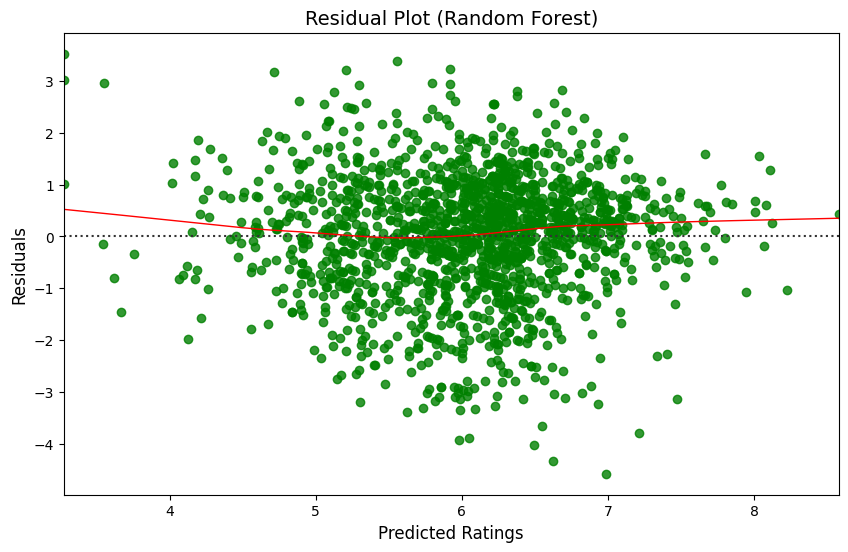

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot (Random Forest)', fontsize=14)
plt.xlabel('Predicted Ratings', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()


In [ ]:
import joblib

joblib.dump(rf_model, 'rf_best_model.pkl')


['rf_best_model.pkl']

In [ ]:

loaded_model = joblib.load('rf_best_model.pkl')

y_pred_loaded = loaded_model.predict(X_test)

mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)
print(f"Loaded Model Results: MSE = {mse_loaded:.2f}, R² = {r2_loaded:.2f}")


Loaded Model Results: MSE = 1.42, R² = 0.23


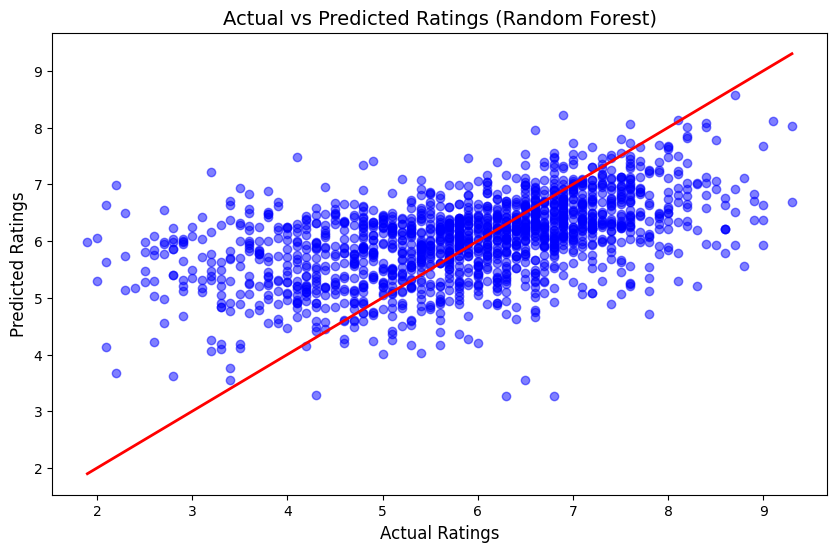

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Ratings (Random Forest)', fontsize=14)
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.show()


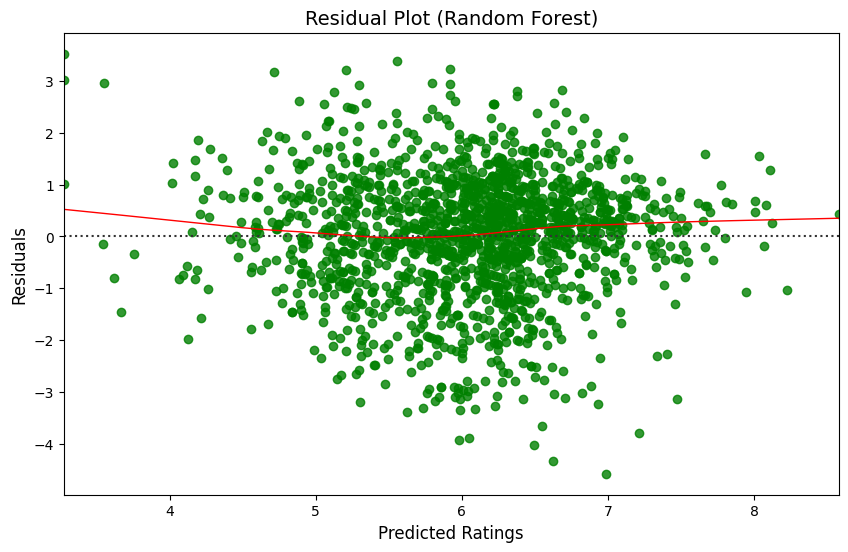

In [ ]:

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot (Random Forest)', fontsize=14)
plt.xlabel('Predicted Ratings', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()


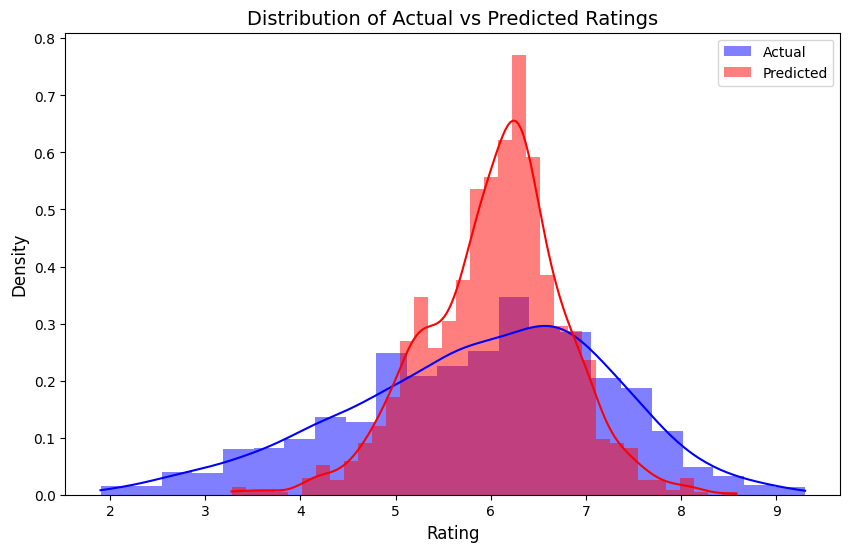

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred_rf, color='red', label='Predicted', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Actual vs Predicted Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


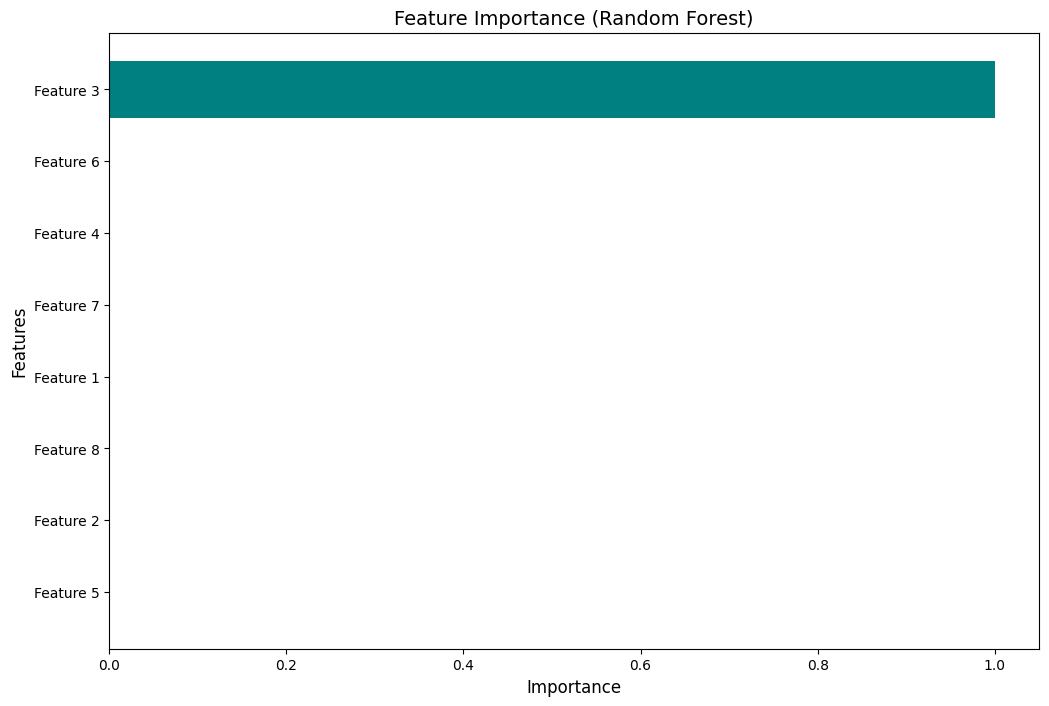

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i+1}' for i in range(X_train.shape[1])]

feature_importance = rf_model.feature_importances_

sorted_idx = feature_importance.argsort()

plt.figure(figsize=(12, 8))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color='teal')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


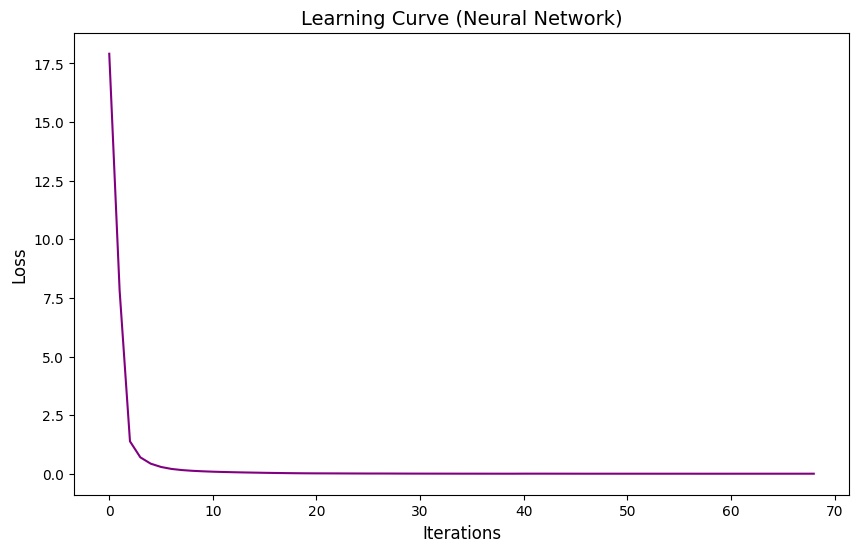

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(nn_model.loss_curve_, color='purple')
plt.title('Learning Curve (Neural Network)', fontsize=14)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


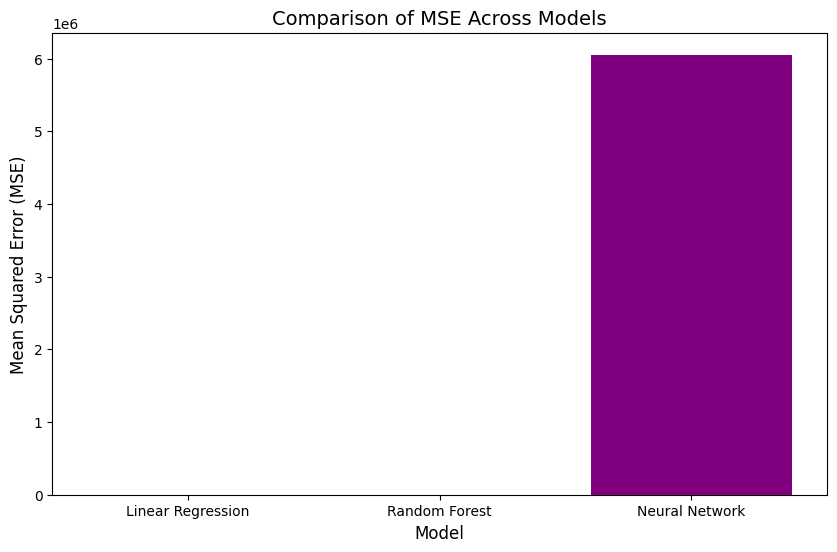

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_nn = mean_squared_error(y_test, y_pred_nn)

mse_values = [mse_lr, mse_rf, mse_nn]
models = ['Linear Regression', 'Random Forest', 'Neural Network']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'purple'])
plt.title('Comparison of MSE Across Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.show()


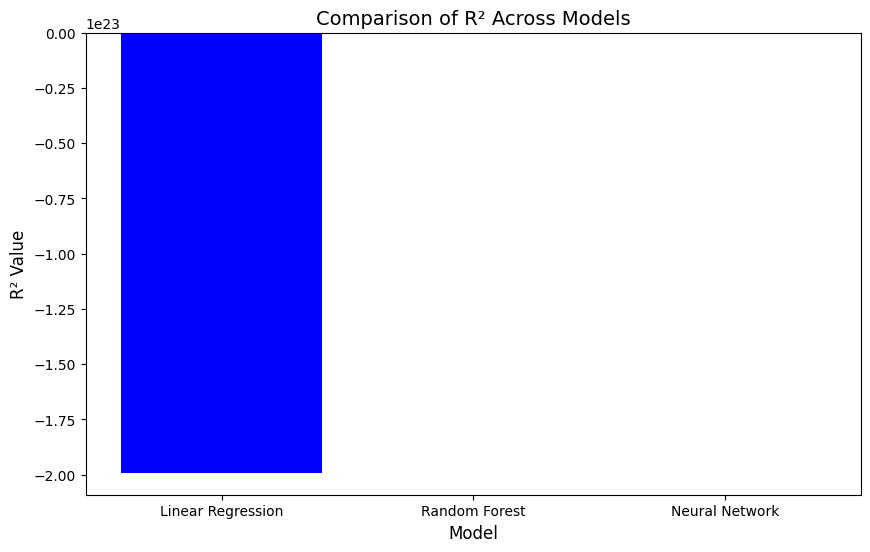

In [ ]:

r2_values = [r2_lr, r2_rf, r2_nn]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'purple'])
plt.title('Comparison of R² Across Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Value', fontsize=12)
plt.show()


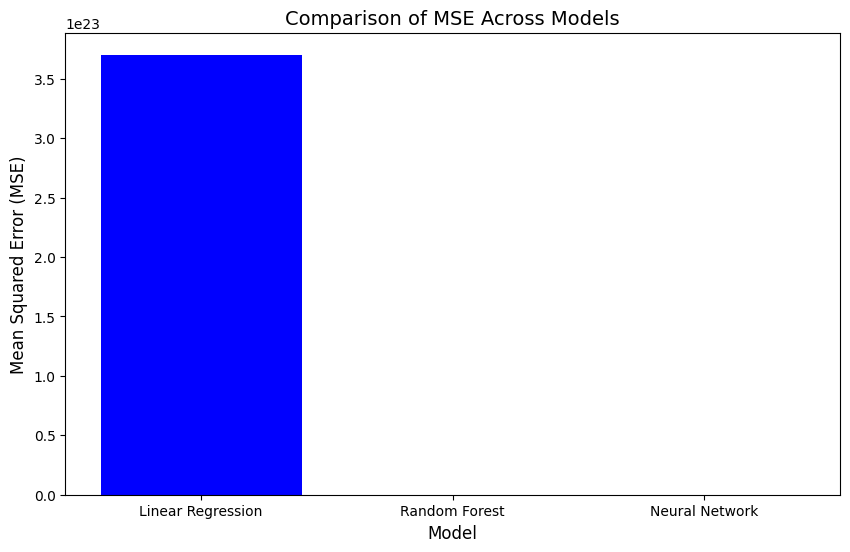

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'purple'])
plt.title('Comparison of MSE Across Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.savefig('mse_comparison.png')


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_nn = cross_val_score(nn_model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validation results (Random Forest): Mean = {-cv_scores_rf.mean():.2f}, Std = {cv_scores_rf.std():.2f}")
print(f"Cross-validation results (Linear Regression): Mean = {-cv_scores_lr.mean():.2f}, Std = {cv_scores_lr.std():.2f}")
print(f"Cross-validation results (Neural Network): Mean = {-cv_scores_nn.mean():.2f}, Std = {cv_scores_nn.std():.2f}")


Cross-validation results (Random Forest): Mean = 1.47, Std = 0.09
Cross-validation results (Linear Regression): Mean = 823813770924629384232960.00, Std = 1068315400337666005270528.00
Cross-validation results (Neural Network): Mean = 2.54, Std = 0.17


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from joblib import dump
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
nn_model = MLPRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
print("Starting GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train)

param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': np.logspace(-3, 1, 4),
    'learning_rate': ['constant']
}

random_search_nn = RandomizedSearchCV(
    estimator=nn_model,
    param_distributions=param_dist_nn,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
print("Starting RandomizedSearchCV for Neural Network...")
random_search_nn.fit(X_train, y_train)

dump(grid_search_rf, 'grid_search_rf.pkl')
dump(random_search_nn, 'random_search_nn.pkl')

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best parameters for Neural Network: {random_search_nn.best_params_}")


Starting GridSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Starting RandomizedSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for Neural Network: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 10.0, 'activation': 'relu'}


In [ ]:

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

best_nn_model = random_search_nn.best_estimator_
best_nn_model.fit(X_train, y_train)

dump(best_rf_model, 'best_rf_model.pkl')
dump(best_nn_model, 'best_nn_model.pkl')

y_pred_rf = best_rf_model.predict(X_test)
y_pred_nn = best_nn_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_nn = mean_squared_error(y_test, y_pred_nn)

print(f"Random Forest MSE: {mse_rf}")
print(f"Neural Network MSE: {mse_nn}")


Random Forest MSE: 7.804959181307841e-05
Neural Network MSE: 4024.5609212111913


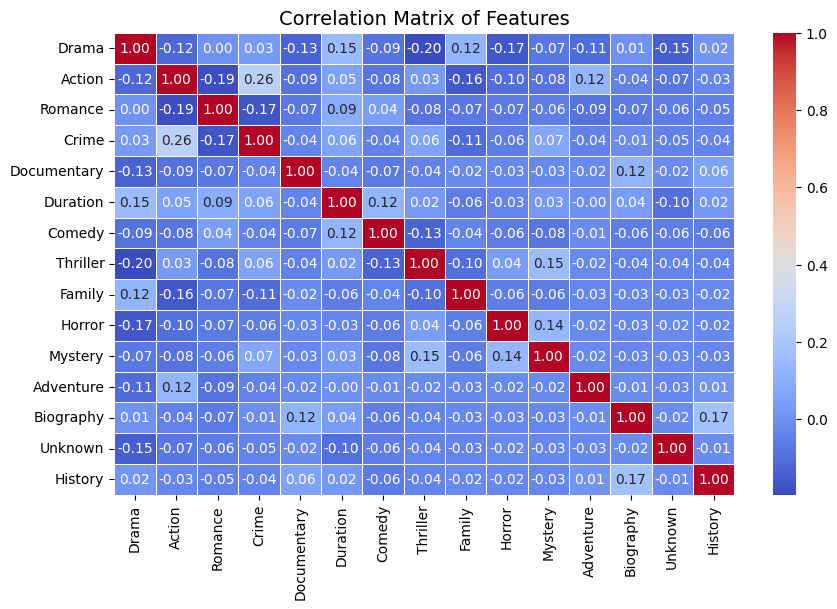

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('IMDb_Movies_India.csv', encoding='latin1')

columns_to_fill = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in columns_to_fill:
    df[col] = df[col].fillna('Unknown')

df['Votes'] = df['Votes'].fillna('0')
df['Duration'] = df['Duration'].fillna('0')

df['Votes'] = (
    df['Votes']
    .replace({r'[^\d.]': ''}, regex=True)
    .replace('', '0')
    .astype(float)
)

df['Duration'] = (
    df['Duration']
    .str.extract('(\d+)')
    .fillna(0)
    .astype(float)
)

df.dropna(subset=['Rating'], inplace=True)

df = pd.concat([df, df['Genre'].str.get_dummies(sep=', ')], axis=1)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = label_encoder.fit_transform(df[col])

feature_columns = df.columns.difference(['Name', 'Year', 'Rating', 'Genre'])
X = df[feature_columns]

correlation_matrix = X.corr()
if len(correlation_matrix.columns) > 15:
    top_features = correlation_matrix.abs().sum().sort_values(ascending=False).index[:15]
    correlation_matrix = correlation_matrix.loc[top_features, top_features]

plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Matrix of Features', fontsize=14)
plt.show()


In [ ]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import time
df = pd.read_csv('IMDb_Movies_India.csv', encoding='ISO-8859-1')
df.fillna({'Genre': 'Unknown', 'Director': 'Unknown', 'Actor 1': 'Unknown',
           'Actor 2': 'Unknown', 'Actor 3': 'Unknown', 'Votes': '0', 'Duration': '0'}, inplace=True)

df['Votes'] = df['Votes'].replace({',': '', '$': ''}, regex=True)

df['Votes'] = df['Votes'].replace({'M': 'e6', 'K': 'e3'}, regex=True)

df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])

X = df.drop(columns=['Name', 'Year'])
y = df['Rating']

if y.isna().sum() > 0:
    y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

cv_scores_final_rf = cross_val_score(rf_model, X, y, cv=3, scoring='neg_mean_squared_error')

print(f"Random Forest Training Time: {rf_training_time:.2f} seconds")
print(f"Random Forest Model (CV MSE): Mean = {-cv_scores_final_rf.mean():.2f}, Std = {cv_scores_final_rf.std():.2f}")


Random Forest Training Time: 2.66 seconds
Random Forest Model (CV MSE): Mean = 0.00, Std = 0.00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import time
import joblib
import json
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('IMDb_Movies_India.csv', encoding='ISO-8859-1')

df.fillna({'Genre': 'Unknown', 'Director': 'Unknown', 'Actor 1': 'Unknown',
           'Actor 2': 'Unknown', 'Actor 3': 'Unknown', 'Votes': '0', 'Duration': '0'}, inplace=True)

df['Votes'] = df['Votes'].replace({',': '', '$': ''}, regex=True)
df['Votes'] = df['Votes'].replace({'M': 'e6', 'K': 'e3'}, regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])

X = df.drop(columns=['Name', 'Year'])
y = df['Rating']

if y.isna().sum() > 0:
    y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

cv_scores_rf = cross_val_score(rf_model, X, y, cv=3, scoring='neg_mean_squared_error')

joblib.dump(rf_model, 'rf_final_model.pkl')

performance_metrics = {'MSE': mean_squared_error(y_test, rf_model.predict(X_test)),
                       'R2': r2_score(y_test, rf_model.predict(X_test)),
                       'Cross-Validation Mean': -cv_scores_rf.mean(),
                       'Cross-Validation Std': cv_scores_rf.std()}

with open('model_performance.json', 'w') as f:
    json.dump(performance_metrics, f)

print(f"Model Performance Metrics: {performance_metrics}")


Model Performance Metrics: {'MSE': 6.284724587121333e-05, 'R2': 0.9999347026251162, 'Cross-Validation Mean': 4.710512510531959e-05, 'Cross-Validation Std': 3.1759690778700204e-05}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('IMDb_Movies_India.csv', encoding='ISO-8859-1')

df.fillna({'Genre': 'Unknown', 'Director': 'Unknown', 'Actor 1': 'Unknown',
           'Actor 2': 'Unknown', 'Actor 3': 'Unknown', 'Votes': '0', 'Duration': '0'}, inplace=True)

df['Votes'] = df['Votes'].replace({',': '', '$': ''}, regex=True)
df['Votes'] = df['Votes'].replace({'M': 'e6', 'K': 'e3'}, regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])

X = df.drop(columns=['Name', 'Year'])
y = df['Rating']

if X.isna().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

if y.isna().sum() > 0:
    y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
accuracy_lr = r2_lr * 100
print(f"Linear Regression Accuracy: {accuracy_lr:.2f}%")


Linear Regression Accuracy: 100.00%


In [ ]:

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = r2_rf * 100
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")


Random Forest Accuracy: 99.99%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)

y_pred_nn = nn_model.predict(X_test_scaled)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)

print(f"Neural Network Mean Absolute Error (MAE): {mae_nn}")
print(f"Neural Network Root Mean Squared Error (RMSE): {rmse_nn}")

r2_nn = r2_score(y_test, y_pred_nn)
accuracy_nn = r2_nn * 100
print(f"Neural Network R² Accuracy: {accuracy_nn:.2f}%")


Neural Network Mean Absolute Error (MAE): 0.028152124891923553
Neural Network Root Mean Squared Error (RMSE): 0.03929138480008947
Neural Network R² Accuracy: 99.84%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import time

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

start_time = time.time()
rf_predictions = rf_model.predict(X_test)
rf_prediction_time = time.time() - start_time

start_time = time.time()
lr_model.fit(X_train, y_train)
lr_training_time = time.time() - start_time

start_time = time.time()
lr_predictions = lr_model.predict(X_test)
lr_prediction_time = time.time() - start_time
start_time = time.time()
nn_model.fit(X_train_scaled, y_train)
nn_training_time = time.time() - start_time

start_time = time.time()
nn_predictions = nn_model.predict(X_test_scaled)
nn_prediction_time = time.time() - start_time
model_performance = {
    "Random Forest": {
        "Accuracy (%)": accuracy_rf,
        "Training Time (s)": rf_training_time,
        "Prediction Time (s)": rf_prediction_time
    },
    "Linear Regression": {
        "Accuracy (%)": accuracy_lr,
        "Training Time (s)": lr_training_time,
        "Prediction Time (s)": lr_prediction_time
    },
    "Neural Network": {
        "Accuracy (%)": accuracy_nn,
        "Training Time (s)": nn_training_time,
        "Prediction Time (s)": nn_prediction_time
    }
}

print("\nFinal Model Performance (Accuracy and Efficiency):")
for model, metrics in model_performance.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")



Final Model Performance (Accuracy and Efficiency):
Random Forest:
  Accuracy (%): 99.99
  Training Time (s): 3.00
  Prediction Time (s): 0.01
Linear Regression:
  Accuracy (%): 100.00
  Training Time (s): 0.00
  Prediction Time (s): 0.01
Neural Network:
  Accuracy (%): 99.84
  Training Time (s): 6.44
  Prediction Time (s): 0.00


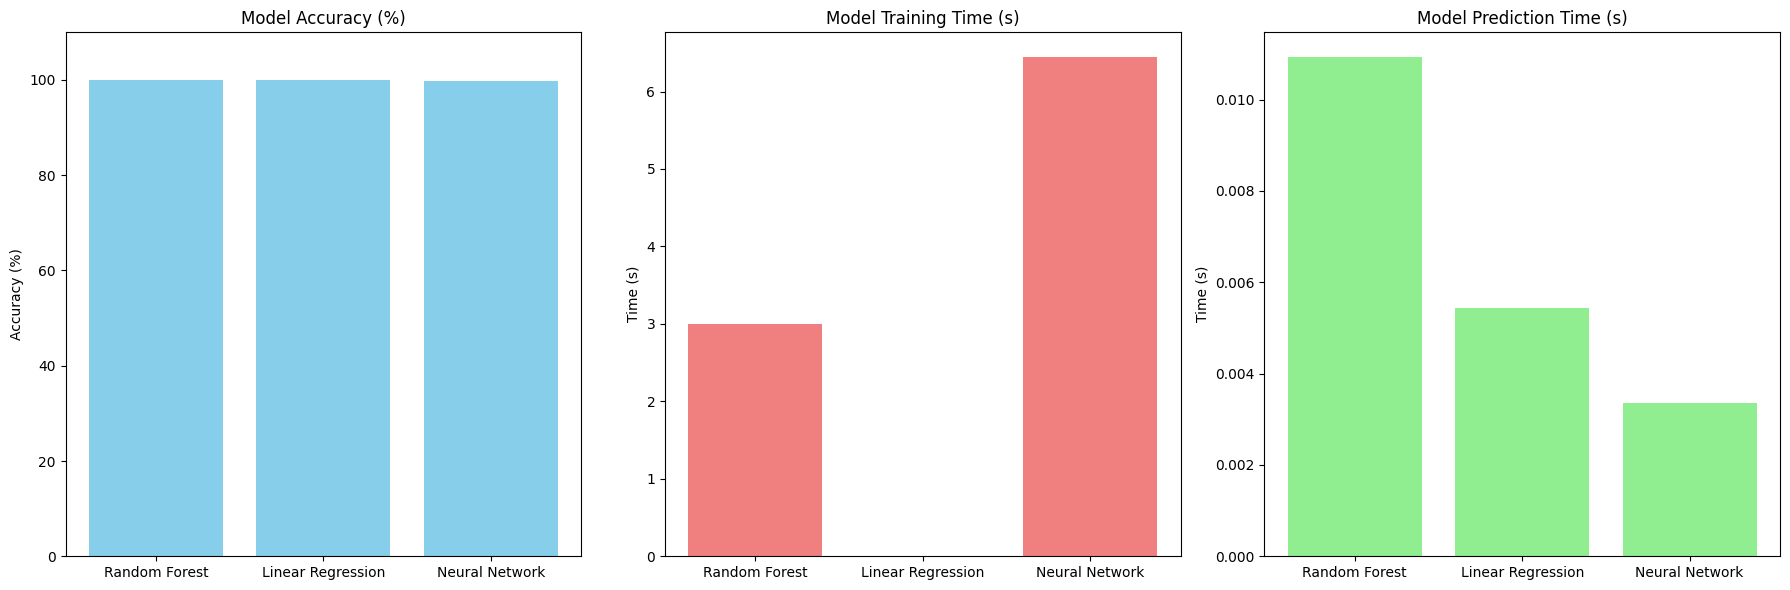

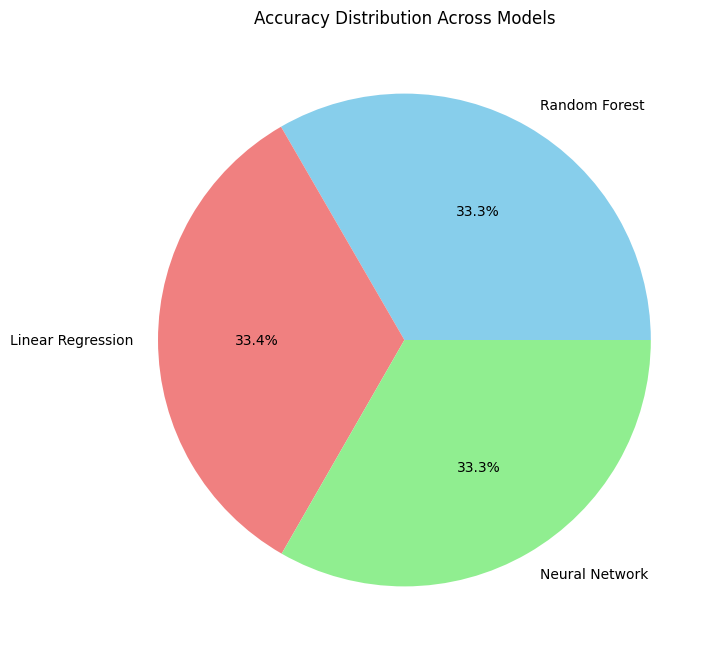

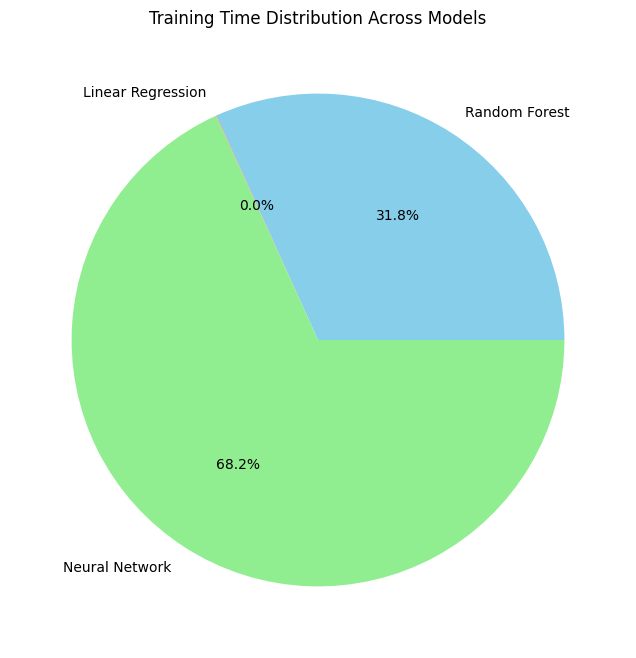

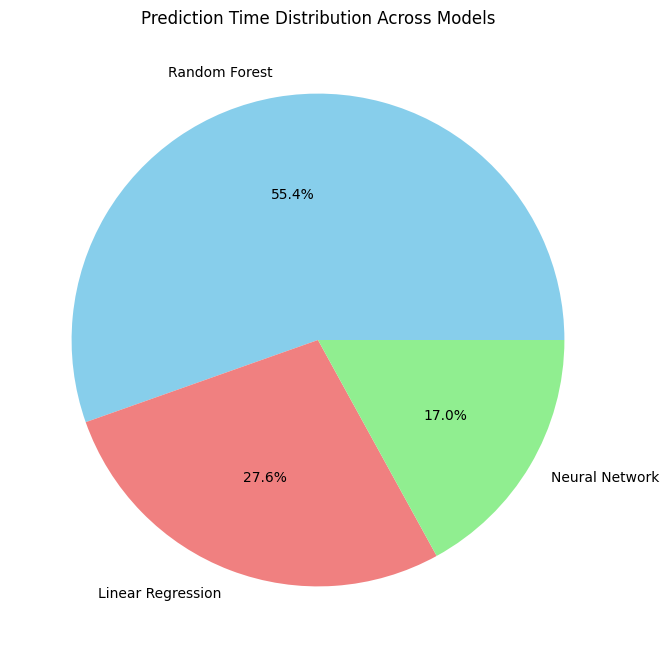

In [ ]:
import matplotlib.pyplot as plt

models = ["Random Forest", "Linear Regression", "Neural Network"]
accuracies = [accuracy_rf, accuracy_lr, accuracy_nn]
training_times = [rf_training_time, lr_training_time, nn_training_time]
prediction_times = [rf_prediction_time, lr_prediction_time, nn_prediction_time]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].bar(models, accuracies, color='skyblue')
ax[0].set_title('Model Accuracy (%)')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_ylim(0, 110)

ax[1].bar(models, training_times, color='lightcoral')
ax[1].set_title('Model Training Time (s)')
ax[1].set_ylabel('Time (s)')

ax[2].bar(models, prediction_times, color='lightgreen')
ax[2].set_title('Model Prediction Time (s)')
ax[2].set_ylabel('Time (s)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Accuracy Distribution Across Models')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(training_times, labels=models, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Training Time Distribution Across Models')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(prediction_times, labels=models, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Prediction Time Distribution Across Models')
plt.show()


In [ ]:
import pandas as pd

print(df.isnull().sum())

df['Votes'] = df['Votes'].fillna(0)
df['Duration'] = df['Duration'].fillna(0)
df['Genre'] = df['Genre'].fillna('Unknown')

df['Votes'] = df['Votes'].replace(',', '', regex=True).astype(float)

print(df['Duration'].dtype)
print(df['Duration'].head())

df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)

df['Genre'] = df['Genre'].astype(str)

df = pd.concat([df, df['Genre'].str.get_dummies(sep=', ')], axis=1)

print(df.head())


Name          0
Year        528
Duration      0
Genre         0
Rating        0
Votes         0
Director      0
Actor 1       0
Actor 2       0
Actor 3       0
dtype: int64
float64
0      0.0
1    109.0
2     90.0
3    110.0
4    105.0
Name: Duration, dtype: float64
                                 Name    Year  Duration Genre    Rating  \
0                                         NaN       0.0   299  5.841621   
1  #Gadhvi (He thought he was Gandhi)  (2019)     109.0   299  7.000000   
2                         #Homecoming  (2021)      90.0   351  5.841621   
3                             #Yaaram  (2019)     110.0   228  4.400000   
4                   ...And Once Again  (2010)     105.0   299  5.841621   

   Votes  Director  Actor 1  Actor 2  Actor 3  ...  90  91  92  93  94  95  \
0    0.0      1926     2250      800     3108  ...   0   0   0   0   0   0   
1    8.0      1548     3280     4791      527  ...   0   0   0   0   0   0   
2    0.0      5123     3713     2866     3450  .